In [2]:
import pandas as pd
import numpy as np

In [3]:
N_spins = 20
df = pd.read_csv(f"../Results_Metropolis/Erro/erro_sampleN{N_spins}.dat",sep=' ')
df

,inter,erroJ,erroh
0,1,0.001860,0.001330
1,2,0.006808,0.005557
2,3,0.023817,0.018262
3,4,0.069040,0.044911
4,5,0.378553,0.293908
...,...,...,...
97068,97069,0.001615,0.001153
97069,97070,0.002462,0.001949
97070,97071,0.002002,0.001483
97071,97072,0.002407,0.001876


In [40]:
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import os
import re
import numpy as np

# Função para selecionar o arquivo .txt
def selecionar_arquivo():
    root = tk.Tk()
    root.withdraw()  # Esconde a janela principal do Tkinter
    
    
    arquivo = filedialog.askopenfilename(
        title="Selecione um arquivo TXT",
        filetypes=(("Text files", "*.dat"), ("All files", "*.*"))
    )
    
    return arquivo

def minimum_values(arquivo):
    pattern = r"erro_sampleN20_err_j_([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)_err_h_([-+]?[0-9]*\.?[0-9]+[eE][-+]?[0-9]+)\.dat"

    file_name = os.path.basename(arquivo)
    match = re.match(pattern, file_name)
    
    if match:
        # Extract values as strings
        j_min_match, h_min_match = match.groups()[0:2]
        
        # Convert to float and format in scientific notation
        j_min_sci = format(float(j_min_match), ".2e")
        h_min_sci = format(float(h_min_match), ".2e")
        
    return j_min_sci, h_min_sci

# Função para carregar dados do arquivo TXT
def carregar_dados(arquivo):
    df = pd.read_csv(arquivo, sep = ' ')
    mcs_values = df['inter'].tolist()
    erroJ_values = df['erroJ'].tolist()
    erroh_values = df['erroh'].tolist()

    
    return mcs_values, erroJ_values, erroh_values

# Função principal para plotar o gráfico
# def plotar_grafico(MCS, erro, arquivo, J):
    
#     minimum = minimum_values(arquivo)
    
#     if(J==True):
#         ylabel = 'Err_J'
#         ymin = float(minimum[0])
#         label =  f' erro_min_J = {ymin}'
#         label_min_err = f' erro_min_J_data = {min(erro):.2e}'
    
#     else:
#         ylabel = 'Err_h'
#         ymin = float(minimum[1])
#         label =  f' erro_min_h = {ymin}'
#         label_min_err = f' erro_min_h_data = {min(erro):.2e}'
    
#     plt.figure(figsize=(16,9))
#     plt.plot(MCS, erro,color='k')
#     plt.plot(MCS,ymin*np.ones(len( MCS)),'--', label=label)
#     plt.xlabel('MCS',fontsize=22)
#     plt.ylabel(ylabel,fontsize=22)
#     plt.xlim([0, max(MCS)])
#     plt.yscale("log")
#     plt.title(f'Erro para t_eq = 3000',fontsize=22)
#     legend = plt.legend(prop={"size":21}, fancybox=True, framealpha=0.0)
#     # Get the legend's bounding box
#     legend_bbox = legend.get_window_extent()
#     # Convert the legend's bounding box to figure coordinates
#     fig = plt.gcf()
#     legend_bbox = fig.transFigure.inverted().transform_bbox(legend_bbox)

#     # Add text below the legend
#     plt.text(
#     x=legend_bbox.x0,  # x-coordinate relative to the figure
#     y=legend_bbox.y0 - 0.05,  # y-coordinate relative to the figure (below the legend)
#     s=label_min_err,  # Text to display
#     transform=fig.transFigure,  # Use figure coordinates
#     fontsize=22,  # Font size
#     ha='left',  # Horizontal alignment
#     va='top'  # Vertical alignment
#     )
#     plt.show()

# Função principal para plotar os gráficos
# Função para plotar os gráficos
def plotar_grafico(mcs, erro, ylabel, ymin, label, label_min_err):
    plt.figure(figsize=(16, 9))
    plt.plot(mcs, erro, color='k')
    plt.plot(mcs, ymin * np.ones(len(mcs)), '--', label=label, linewidth=1.4)
    plt.xlabel('MCS', fontsize=22)
    plt.ylabel(ylabel, fontsize=22)
    plt.xlim([0, max(mcs)])
    plt.yscale("log")
    plt.title('Erro para t_eq = 3000', fontsize=22)
    
    legend = plt.legend(prop={"size": 21}, fancybox=True, framealpha=0.0)
    legend_bbox = legend.get_window_extent()
    
    fig = plt.gcf()
    legend_bbox = fig.transFigure.inverted().transform_bbox(legend_bbox)
    
    # Ajustando o posicionamento do texto para ficar abaixo da legenda
    plt.text(
        x=legend_bbox.x0, 
        y=legend_bbox.y0 - 0.05, 
        s=label_min_err, 
        transform=fig.transFigure, 
        fontsize=22, 
        ha='left', 
        va='top'
    )
    
    plt.show()

# Função principal para plotar os gráficos
def plotar_graficos(mcs, erroJ, erroh, arquivo):
    minimum = minimum_values(arquivo)
    
    # Plot para Err_J
    plotar_grafico(
        mcs, erroJ, 'Err_J', float(minimum[0]), 
        f'erro_min_J = {float(minimum[0]):.2e}', 
        f'erro_min_J_data = {min(erroJ):.2e}'
    )
    
    # Plot para Err_h
    plotar_grafico(
        mcs, erroh, 'Err_h', float(minimum[1]), 
        f'erro_min_h = {float(minimum[1]):.2e}', 
        f'erro_min_h_data = {min(erroh):.2e}'
    )

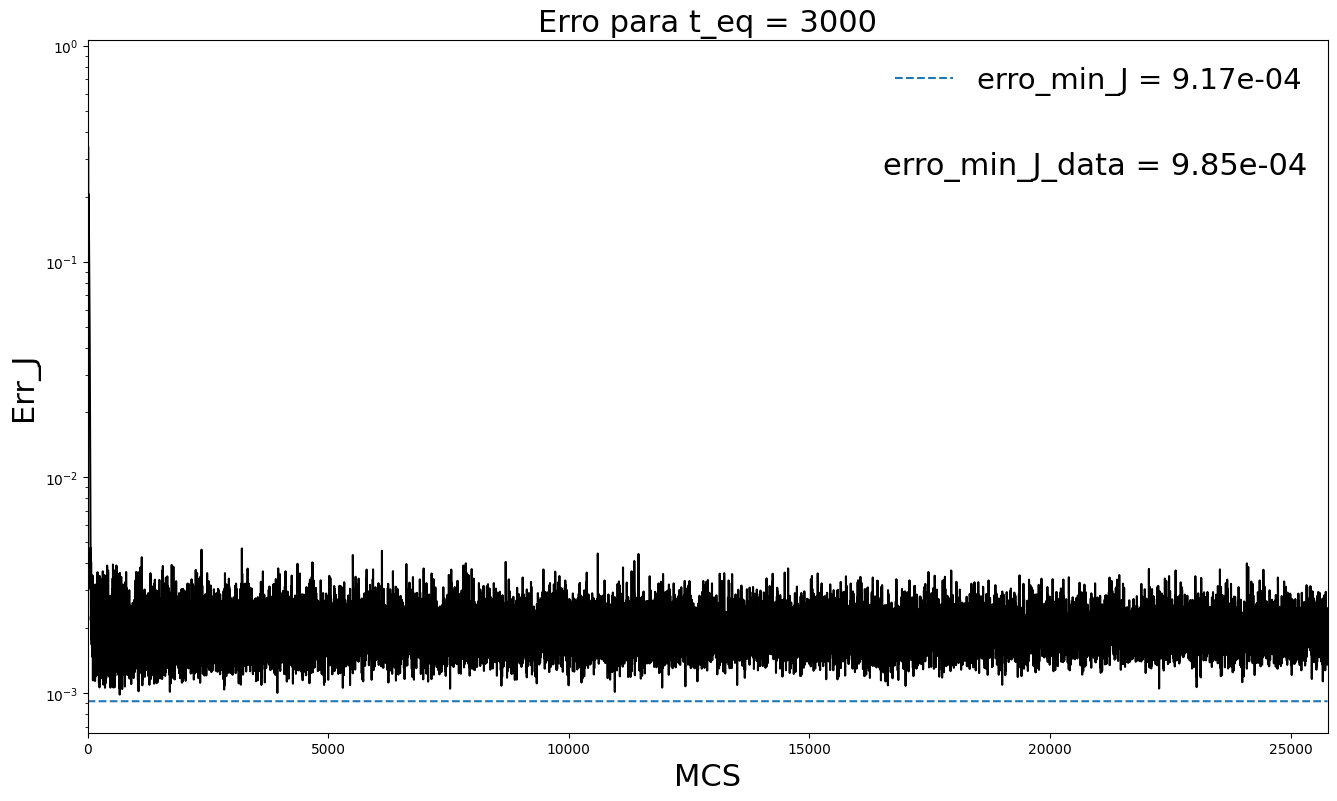

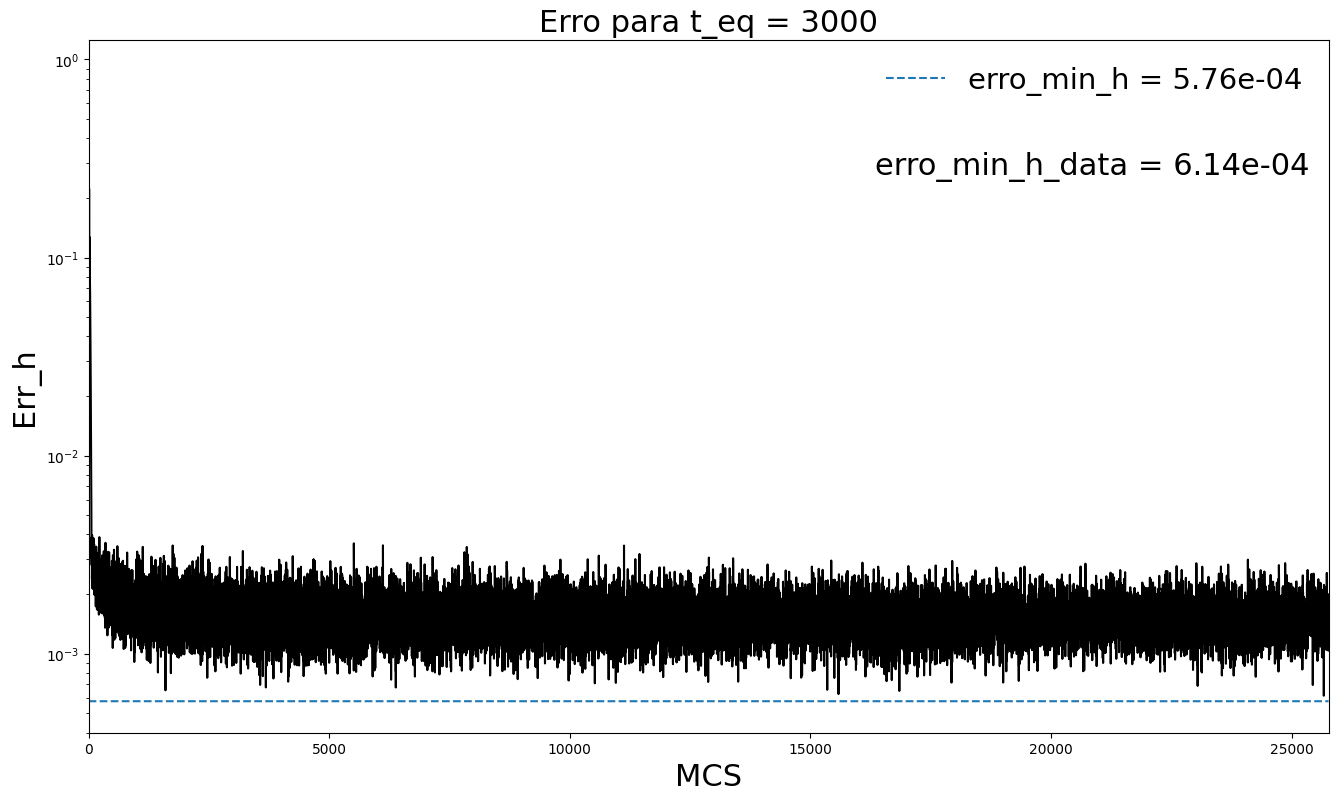

In [53]:
if __name__ == "__main__":
    j = False

    arquivo_selecionado = selecionar_arquivo()
    if arquivo_selecionado:
        mcs_values, erroJ_values, erroh_values = carregar_dados(arquivo_selecionado)
        plotar_graficos(mcs_values, erroJ_values, erroh_values, arquivo_selecionado)
        # MCS, erro = carregar_dados(arquivo_selecionado, J=j)
        # plotar_grafico(MCS, erro, arquivo_selecionado ,J=j)
    else:
        print("Nenhum arquivo foi selecionado.")

In [4]:
max(df['inter'].values)
#df["erroJ"].values

np.int64(97073)

97073


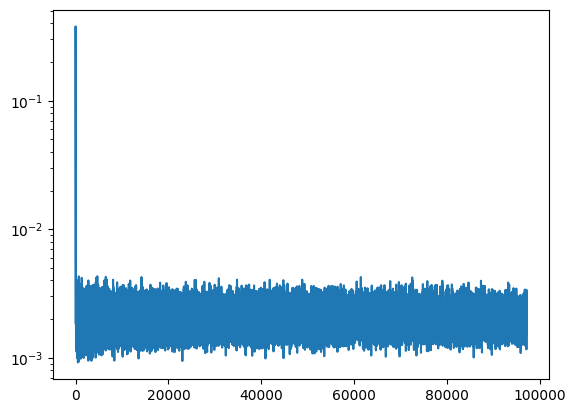

In [6]:
import matplotlib.pyplot as plt

plt.plot(df["inter"].values,df["erroJ"].values)
plt.yscale("log")
print(max(df['inter']))
plt.show()

In [ ]:
#par = 'correlation'
#file = f"../Results_Metropolis/Comparative/{par}/"